In [60]:
import fastf1 as ff1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
ff1.Cache.enable_cache('cache')
import numpy as np


In [34]:
session = ff1.get_session(2023, 'Spain', 'Q')
session.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	No cached data found for season_schedule. Loading data...
_api           INFO 	Fetching season schedule...
req            INFO 	Data has been written to cache!
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.1.2]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...


In [5]:
df = session.laps.base_class_view[['Driver','Team', 'LapTime', 'LapNumber', 'Stint','Compound', 'TyreLife']]
df['LapTime_seconds'] = df['LapTime'].dt.total_seconds()
avg_times = df.groupby('Driver')['LapTime_seconds'].mean().sort_values()

df['stint_compound']= df['Compound'] + '_' +df['Stint'].astype('str')
df = df.sort_values(by=['Stint'])
colors = {}
for sint_compound in df['stint_compound'].unique():
    if 'HARD' in sint_compound:
        colors[sint_compound] = 'black'
    elif 'MEDIUM' in sint_compound:
        colors[sint_compound] = 'yellow'
    elif 'SOFT' in sint_compound:
        colors[sint_compound] = 'red'
    else:
        colors[sint_compound] = 'purple'



In [20]:
import plotly.express as px

# Création du boxplot avec plotly
fig = px.box(
    df,
    x="Driver",
    y="LapTime_seconds",
    color="stint_compound",
    category_orders={"Driver": avg_times.index.tolist()},  # pour ordonner les pilotes
    color_discrete_map=colors,  # utilisez votre dictionnaire de couleurs
    title='Boxplot of Lap Times by Driver and Stint',
    labels={"LapTime_seconds": "Lap Time (seconds)", "Driver": "Driver"},
    points='all',    
    )
# Rotation des labels de l'axe x
fig.update_layout(xaxis_tickangle=-45,yaxis_range=[df['LapTime_seconds'].min(), 84])

#yaxis_range=[df['LapTime_seconds'].min(), 105]
# Affichage du graphique
fig.show()


In [18]:
import plotly.express as px

# Création du boxplot avec plotly
fig = px.box(
    df,
    x="Driver",
    y="LapTime_seconds",
    color="Stint",
    category_orders={"Driver": avg_times.index.tolist()},  # pour ordonner les pilotes
    #color_discrete_map={'SOFT':'red','MEDIUM':'yellow','HARD':'black','TEST_UNKNOWN':'purple'},  # utilisez votre dictionnaire de couleurs
    title='Boxplot of Lap Times by Driver and Stint',
    labels={"LapTime_seconds": "Lap Time (seconds)", "Driver": "Driver"},
    points='all',    
    )
# Rotation des labels de l'axe x
fig.update_layout(xaxis_tickangle=-45,yaxis_range=[df['LapTime_seconds'].min(), 87])

#yaxis_range=[df['LapTime_seconds'].min(), 105]
# Affichage du graphique
fig.show()

In [38]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,,NaN,0 days 00:01:20.851000,0 days 00:01:19.092000,0 days 00:01:25.858000,NaT,,NaN
27,27,N HULKENBERG,HUL,hulkenberg,Haas F1 Team,B6BABD,haas,Nico,Hulkenberg,Nico Hulkenberg,...,GER,2.0,,NaN,0 days 00:01:22.730000,0 days 00:01:20.305000,0 days 00:01:27.102000,NaT,,NaN
14,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,3.0,,NaN,0 days 00:01:21.481000,0 days 00:01:19.776000,0 days 00:01:27.286000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,4.0,,NaN,0 days 00:01:21.554000,0 days 00:01:20.426000,0 days 00:01:27.627000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,5.0,,NaN,0 days 00:01:21.798000,0 days 00:01:20.098000,0 days 00:01:27.893000,NaT,,NaN
31,31,E OCON,OCO,ocon,Alpine,2293D1,alpine,Esteban,Ocon,Esteban Ocon,...,FRA,6.0,,NaN,0 days 00:01:22.114000,0 days 00:01:20.406000,0 days 00:01:27.945000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,F58020,mclaren,Lando,Norris,Lando Norris,...,GBR,7.0,,NaN,0 days 00:01:21.998000,0 days 00:01:19.347000,0 days 00:01:28.046000,NaT,,NaN
55,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,8.0,,NaN,0 days 00:01:22.248000,0 days 00:01:19.856000,0 days 00:01:29.294000,NaT,,NaN
81,81,O PIASTRI,PIA,piastri,McLaren,F58020,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,9.0,,NaN,0 days 00:01:22.190000,0 days 00:01:19.659000,0 days 00:01:31.349000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,10.0,,NaN,0 days 00:01:21.938000,0 days 00:01:18.725000,NaT,NaT,,NaN


In [96]:
session.results[['Abbreviation','Q3']].iloc[0:9]

,Abbreviation,Q3
1,VER,0 days 00:01:12.272000
55,SAI,0 days 00:01:12.734000
4,NOR,0 days 00:01:12.792000
10,GAS,0 days 00:01:12.816000
44,HAM,0 days 00:01:12.818000
18,STR,0 days 00:01:12.994000
31,OCO,0 days 00:01:13.083000
27,HUL,0 days 00:01:13.229000
14,ALO,0 days 00:01:13.507000


In [97]:
df = session.results[['Abbreviation','Q3']].iloc[0:9]
df['LapTime_seconds'] = df['Q3'].dt.total_seconds()
df = df.sort_values(by=['LapTime_seconds'])
df['LapTime_seconds_to_best'] = df['LapTime_seconds'] - min(df['LapTime_seconds'])


In [98]:
fig = go.Figure(
    data=[
        go.Bar(
            y=df["LapTime_seconds_to_best"],
            x=df["Abbreviation"],
            marker=dict(
                color=df["LapTime_seconds_to_best"],
                colorscale="Blues",
                colorbar=dict(title="LapTime_seconds_to_best"),
            ),
        )
    ]
)

fig.show()

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.1.2]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No c

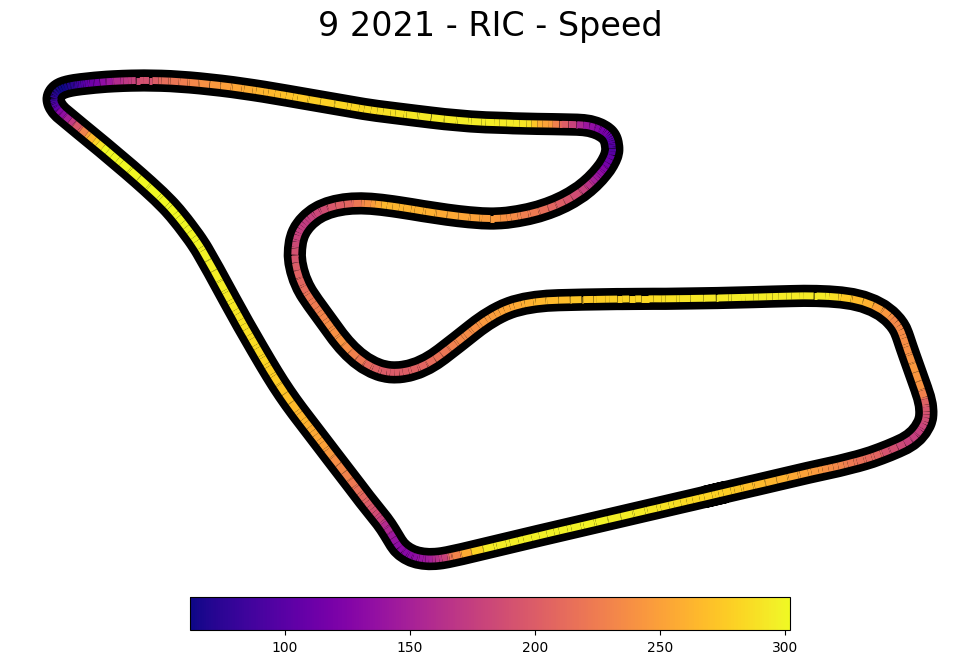

In [99]:
"""Speed visualization on track map
======================================

(Example provided by @JSEHV on Github)
"""
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection


##############################################################################
# First, we define some variables that allow us to conveniently control what
# we want to plot.
year = 2021
wknd = 9
ses = 'R'
driver = 'RIC'
colormap = mpl.cm.plasma


##############################################################################
# Next, we load the session and select the desired data.
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap = session.laps.pick_driver(driver).pick_fastest()

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis
color = lap.telemetry['Speed']      # value to base color gradient on


##############################################################################
# Now, we create a set of line segments so that we can color them
# individually. This creates the points as a N x 1 x 2 array so that we can
# stack points  together easily to get the segments. The segments array for
# line collection needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)


##############################################################################
# After this, we can actually plot the data.

# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} {year} - {driver} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')


# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(color.min(), color.max())
lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

# Set the values used for colormapping
lc.set_array(color)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")


# Show the plot
plt.show()


In [107]:
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)


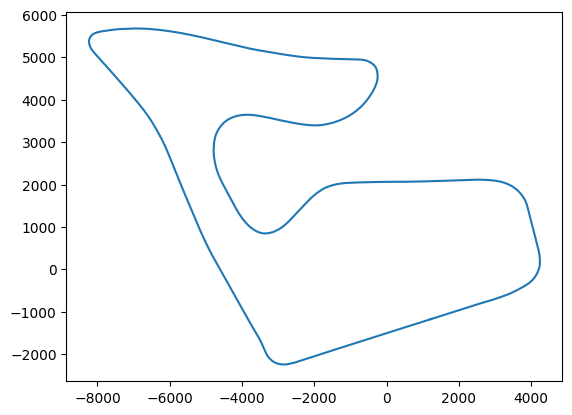

In [108]:
plt.plot(lap.telemetry['X'], lap.telemetry['Y'])

In [168]:
session.laps.pick_driver('LEC').pick_laps(1).get_car_data()

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2021-07-04 13:02:55.580,9929,0,1,30,True,1,car,0 days 00:00:00.091000,0 days 01:01:55.568000
1,2021-07-04 13:02:55.820,10009,0,1,30,True,1,car,0 days 00:00:00.331000,0 days 01:01:55.808000
2,2021-07-04 13:02:56.021,9169,0,1,30,False,1,car,0 days 00:00:00.532000,0 days 01:01:56.009000
3,2021-07-04 13:02:56.261,7629,9,1,32,False,1,car,0 days 00:00:00.772000,0 days 01:01:56.249000
4,2021-07-04 13:02:56.501,5949,24,1,36,False,1,car,0 days 00:00:01.012000,0 days 01:01:56.489000
...,...,...,...,...,...,...,...,...,...,...
428,2021-07-04 13:04:38.621,10110,133,3,57,False,1,car,0 days 00:01:43.132000,0 days 01:03:38.609000
429,2021-07-04 13:04:38.901,9398,139,3,58,False,1,car,0 days 00:01:43.412000,0 days 01:03:38.889000
430,2021-07-04 13:04:39.141,9004,143,4,61,False,1,car,0 days 00:01:43.652000,0 days 01:03:39.129000
431,2021-07-04 13:04:39.381,9465,150,4,68,False,1,car,0 days 00:01:43.892000,0 days 01:03:39.369000


In [169]:
session.laps.pick_driver('LEC').pick_lap(1).get_pos_data()

,Date,Status,X,Y,Z,Source,Time,SessionTime
0,2021-07-04 13:02:55.621,OnTrack,1010,-1232,7214,pos,0 days 00:00:00.132000,0 days 01:01:55.609000
1,2021-07-04 13:02:55.841,OnTrack,1010,-1232,7214,pos,0 days 00:00:00.352000,0 days 01:01:55.829000
2,2021-07-04 13:02:56.061,OnTrack,1010,-1232,7214,pos,0 days 00:00:00.572000,0 days 01:01:56.049000
3,2021-07-04 13:02:56.281,OnTrack,1003,-1234,7215,pos,0 days 00:00:00.792000,0 days 01:01:56.269000
4,2021-07-04 13:02:56.501,OnTrack,991,-1236,7215,pos,0 days 00:00:01.012000,0 days 01:01:56.489000
...,...,...,...,...,...,...,...,...
471,2021-07-04 13:04:38.940,OnTrack,1651,-1059,7217,pos,0 days 00:01:43.451000,0 days 01:03:38.928000
472,2021-07-04 13:04:39.141,OnTrack,1575,-1080,7216,pos,0 days 00:01:43.652000,0 days 01:03:39.129000
473,2021-07-04 13:04:39.361,OnTrack,1489,-1103,7215,pos,0 days 00:01:43.872000,0 days 01:03:39.349000
474,2021-07-04 13:04:39.581,OnTrack,1400,-1127,7215,pos,0 days 00:01:44.092000,0 days 01:03:39.569000


In [122]:
session.laps.pick_driver('LEC').get_telemetry().columns

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')

In [126]:
session.laps.pick_driver('LEC')

Time                      0 days 02:08:23.237000
Driver                                       LEC
DriverNumber                                  16
LapTime                   0 days 00:01:08.698000
LapNumber                                   55.0
Stint                                        2.0
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:17.135000
Sector2Time               0 days 00:00:30.789000
Sector3Time               0 days 00:00:20.774000
Sector1SessionTime        0 days 02:07:31.731000
Sector2SessionTime        0 days 02:08:02.520000
Sector3SessionTime        0 days 02:08:23.294000
SpeedI1                                    316.0
SpeedI2                                    230.0
SpeedFL                                    283.0
SpeedST                                    314.0
IsPersonalBest                              True
Compound                                    HARD
TyreLife            